In [1]:
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
#Set Index Datetime
def equalizestock(time):
#     time.index = pd.to_datetime(time.index)
    if time.index.name != 'date':
        time = time.set_index('date')
        time = time.loc['2017-12-31':'2019-01-31']
        return time
    else:
        time = time.loc['2017-12-31':'2019-01-31']
        return time

In [25]:
ts = TimeSeries(key='X5AYBIDIH2EVGNW9', output_format='pandas')
stock, meta_data = ts.get_daily(symbol='SPY', outputsize='full')
stock = stock['4. close']
stock = pd.DataFrame({'date':stock.index, 'close':stock.values})
stock.head()

date    close
0  1998-01-02  97.5625
1  1998-01-05  97.7812
2  1998-01-06  96.2187
3  1998-01-07  96.4687
4  1998-01-08  95.6250

In [27]:
stock = equalizestock(stock)
stock = stock.pct_change()
stock = stock.dropna()
stock.head()

close
date                
2018-01-03  0.006325
2018-01-04  0.004215
2018-01-05  0.006664
2018-01-08  0.001829
2018-01-09  0.002263

In [5]:
fig = plt.figure(figsize=(12, 8))
stock['close'].plot()
plt.ylabel("S&P 500 price")

Text(0, 0.5, 'S&P 500 price')

In [8]:
from calendar import Calendar

In [66]:
df = pd.date_range(start='12/31/2017', end='01/31/2019')
df = pd.DataFrame(df)

In [67]:
df.columns = ['date']
df['weekday'] = df['date'].dt.dayofweek
df = df[df['weekday'] < 5]

In [68]:
df = df.set_index(df['date'])

In [69]:
df = df.drop(['date'], axis=1)
df

weekday
date               
2018-01-01        0
2018-01-02        1
2018-01-03        2
2018-01-04        3
2018-01-05        4
2018-01-08        0
2018-01-09        1
2018-01-10        2
2018-01-11        3
2018-01-12        4
2018-01-15        0
2018-01-16        1
2018-01-17        2
2018-01-18        3
2018-01-19        4
2018-01-22        0
2018-01-23        1
2018-01-24        2
2018-01-25        3
2018-01-26        4
2018-01-29        0
2018-01-30        1
2018-01-31        2
2018-02-01        3
2018-02-02        4
2018-02-05        0
2018-02-06        1
2018-02-07        2
2018-02-08        3
2018-02-09        4
...             ...
2018-12-21        4
2018-12-24        0
2018-12-25        1
2018-12-26        2
2018-12-27        3
2018-12-28        4
2018-12-31        0
2019-01-01        1
2019-01-02        2
2019-01-03        3
2019-01-04        4
2019-01-07        0
2019-01-08        1
2019-01-09        2
2019-01-10        3
2019-01-11        4
2019-01-14        0
2019-01-15        1
2019-01-16        2
2019-01-17        3
2019-01-18        4
2019-01-21        0
2019-01-22        1
2019-01-23        2
2019-01-24        3
2019-01-25        4
2019-01-28        0
2019-01-29        1
2019-01-30        2
2019-01-31        3

[284 rows x 1 columns]

In [7]:
ts = stock['close']
ts.head()

date
2018-01-03    0.006325
2018-01-04    0.004215
2018-01-05    0.006664
2018-01-08    0.001829
2018-01-09    0.002263
Name: close, dtype: float64

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling(timeseries, window=12)
    rolmean = timeseries.rolling(window=12).mean()
#     rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

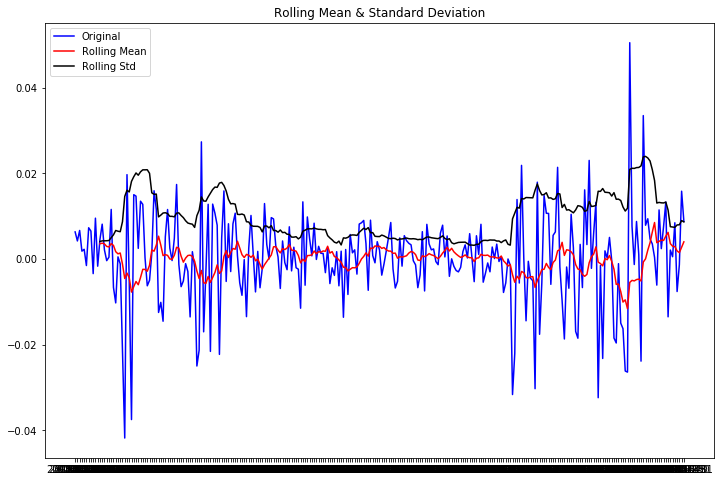

Results of Dickey-Fuller Test:
Test Statistic                -1.650953e+01
p-value                        2.112202e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.700000e+02
Critical Value (1%)           -3.454804e+00
Critical Value (5%)           -2.872305e+00
Critical Value (10%)          -2.572506e+00
dtype: float64


In [9]:
test_stationarity(ts)

In [10]:
ts

date
2018-01-03    0.006325
2018-01-04    0.004215
2018-01-05    0.006664
2018-01-08    0.001829
2018-01-09    0.002263
2018-01-10   -0.001530
2018-01-11    0.007296
2018-01-12    0.006519
2018-01-16   -0.003418
2018-01-17    0.009532
2018-01-18   -0.001681
2018-01-19    0.004550
2018-01-22    0.008131
2018-01-23    0.002122
2018-01-24   -0.000388
2018-01-25    0.000424
2018-01-26    0.011578
2018-01-29   -0.006630
2018-01-30   -0.010257
2018-01-31    0.000497
2018-02-01   -0.001135
2018-02-02   -0.021770
2018-02-05   -0.041822
2018-02-06    0.019702
2018-02-07   -0.005425
2018-02-08   -0.037509
2018-02-09    0.015022
2018-02-12    0.014685
2018-02-13    0.002487
2018-02-14    0.013496
                ...   
2018-12-18   -0.001096
2018-12-19   -0.014976
2018-12-20   -0.016278
2018-12-21   -0.026176
2018-12-24   -0.026423
2018-12-26    0.050525
2018-12-27    0.007677
2018-12-28   -0.001290
2018-12-31    0.008759
2019-01-02    0.001040
2019-01-03   -0.023863
2019-01-04    0.033496
2019-0

## Seasonality Adjustment via Differencing

In [9]:
ts_diff_trans = ts -ts.shift(5)
ts_diff_trans.dropna(inplace=True)
plt.plot(ts_diff_trans)
ts_diff_trans.head(10)

date
2018-01-10   -0.007855
2018-01-11    0.003081
2018-01-12   -0.000145
2018-01-16   -0.005247
2018-01-17    0.007268
2018-01-18   -0.000151
2018-01-19   -0.002746
2018-01-22    0.001612
2018-01-23    0.005541
2018-01-24   -0.009920
Name: close, dtype: float64

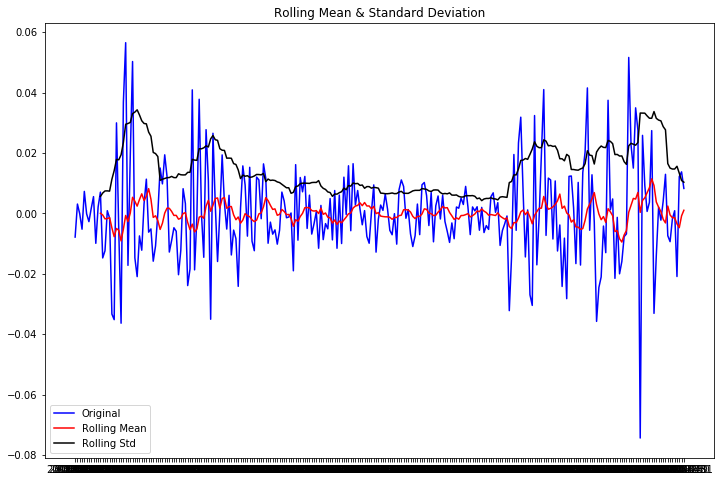

Results of Dickey-Fuller Test:
Test Statistic                -7.222731e+00
p-value                        2.090862e-10
#Lags Used                     1.400000e+01
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64


In [10]:
test_stationarity(ts_diff_trans)

## Forecasting

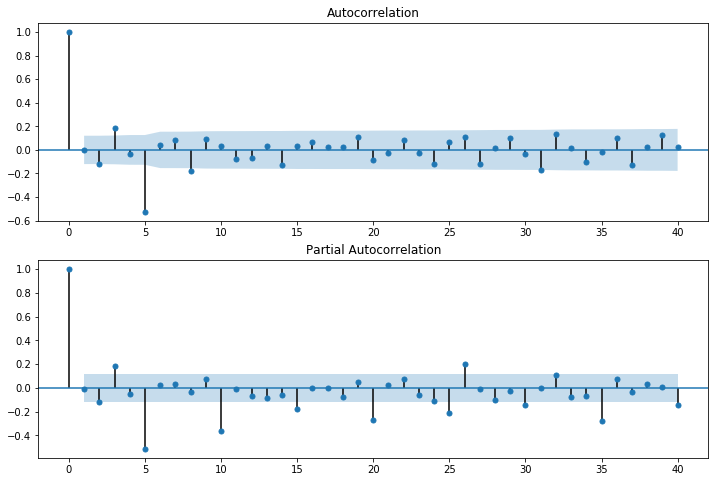

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize = (12,8))
pyplot.subplot(211)
plot_acf(ts_diff_trans, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(ts_diff_trans, ax=pyplot.gca(), lags=40)
pyplot.show()

In [12]:
mod = sm.tsa.statespace.SARIMAX(ts_diff_trans,
                                order=(0, 0, 1),
                                seasonal_order=(0, 1, 1, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/Users/flatironschool/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/flatironschool/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1421      0.083      1.719      0.086      -0.020       0.304
ma.L1         -0.9679      0.067    -14.427      0.000      -1.099      -0.836
ar.S.L52      -0.5828      0.105     -5.548      0.000      -0.789      -0.377
ma.S.L52       3.0210      1.636      1.847      0.065      -0.185       6.228
sigma2      4.278e-05   4.71e-05      0.908      0.364   -4.96e-05       0.000


In [1]:
stock['forecast'] = results.predict(start = 200, end= 260, dynamic= True)  
stock[['close', 'forecast']].plot(kind='scatter',figsize=(12, 8))

NameError: name 'results' is not defined

In [14]:
stock.head()

close  forecast
date                          
2018-01-03  0.006325       NaN
2018-01-04  0.004215       NaN
2018-01-05  0.006664       NaN
2018-01-08  0.001829       NaN
2018-01-09  0.002263       NaN

In [15]:
stock = stock.dropna()

In [16]:
stock['residual'] = stock['forecast'] - stock['close']

In [17]:
stock.head()

close  forecast  residual
date                                    
2018-10-25  0.017941 -0.000035 -0.017976
2018-10-26 -0.017587  0.000158  0.017745
2018-10-29 -0.005540  0.001255  0.006795
2018-10-30  0.014818  0.007377 -0.007442
2018-10-31  0.010681  0.011122  0.000442

In [18]:
stock.plot()

In [19]:
stock['residual'] = stock["residual"].apply(lambda x: 0 if x<0 else 1)

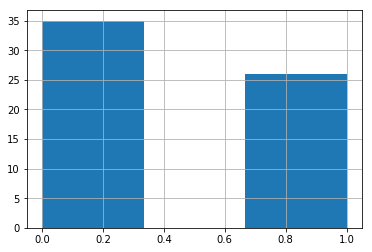

In [25]:
stock['residual'].hist(bins=3)

In [ ]:
#more negative residual than positive ; 